# 吴恩达深度学习课后练习

### 第二周测验

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt

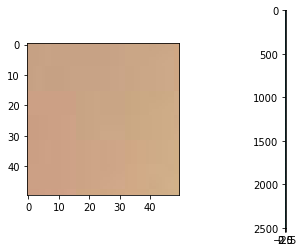

In [10]:
img = plt.imread("G:/picture/2.jpg")
img = img[0:50,0:50,:]
plt.subplot(121)
plt.imshow(img)

img2 = img.reshape(50*50,3)
plt.subplot(122)
plt.imshow(img2)

In [21]:
###  numpy.random.randint()
# numpy.random.randint(low, high=None, size=None, dtype=’l’)

# 返回随机整数，范围区间为[low,high），包含low，不包含high
# 参数：low为最小值，high为最大值，size为数组维度大小，dtype为数据类型，默认的数据类型是np.int
# high没有填写时，默认生成随机数的范围是[0，low)

(30, 30, 3)
[[[170 211  66]
  [132 253 121]
  [107 178 111]
  ...
  [ 68 157   4]
  [118  43 132]
  [243  17  92]]

 [[111  74   8]
  [ 60 164 240]
  [191 220 142]
  ...
  [165   0  79]
  [ 79 201  96]
  [ 24  38  10]]

 [[ 24 206 152]
  [ 80 226 110]
  [ 97 214 181]
  ...
  [ 77 119  51]
  [  7 214 160]
  [ 58 146 138]]

 ...

 [[ 50 116  28]
  [ 87 137 116]
  [159 180 201]
  ...
  [100  20  32]
  [111  52 235]
  [117  42 151]]

 [[ 87  65 113]
  [107 116 195]
  [195 164 220]
  ...
  [141 247  47]
  [ 67  39 182]
  [ 54 136  29]]

 [[ 93 242  74]
  [ 94 206 118]
  [ 24  49 134]
  ...
  [165  51 244]
  [179  75 251]
  [125 243  39]]]


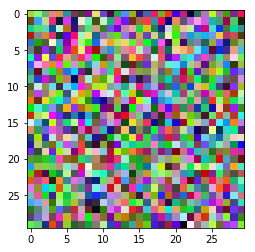

In [19]:
np.random.randint()
a = np.random.randint(0,256,size=(30,30,3))
plt.imshow(a)
print(a.shape)
print(a)

In [33]:
a =  np.random.rand(3,3)
b = np.random.rand(3,)
c = np.matmul(a,b)
d = np.dot(a,b)
e = a*b
print(c)
print(d)
print(e.shape)

[0.66447552 0.11466498 1.40303163]
[0.66447552 0.11466498 1.40303163]
(3, 3)


### 第二周编程作业
* 数据集

    train set:209张（64x64）
    
    test  set:50张 （64x64)
    
    label : 0  1

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

In [131]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()

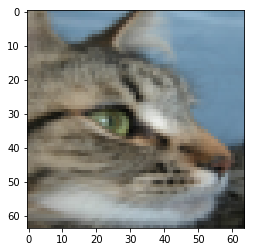

In [211]:
plt.imshow(train_set_x_orig[np.random.randint(0,209)])

In [212]:
m_train = train_set_x_orig.shape[0]
print(m_train)
m_train_label = train_set_y.shape[0]
print(m_train_label)

209
1


### 数据降维

In [134]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print("训练集图像降维为：",train_set_x_flatten.shape)
print("训练集标签维度为：",train_set_y.shape)
print("测试集图像降维为：",test_set_x_flatten.shape)
print("测试集标签维度为：",test_set_y.shape)

训练集图像降维为： (12288, 209)
训练集标签维度为： (1, 209)
测试集图像降维为： (12288, 50)
测试集标签维度为： (1, 50)


### 标准化（像素值转化为[0，1]之间）

In [135]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [136]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [137]:
# 初始化参数 w b 
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    assert(w.shape == (dim,1))
    #断言b的类型是float或者int
    assert(isinstance(b,float) or isinstance(b,int)) 
    return (w,b)

初始化参数的函数已经构建好了，现在就可以执行“前向”和“后向”传播步骤来学习参数。

我们现在要实现一个计算成本函数及其渐变的函数propagate（）。

In [138]:
def propagate(w,b,X,Y):
    # 样本数量
    m = X.shape[1]  #X shape  (12288,209)
    # 正向
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    # 反向
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    # 创建一个字典，保存dw,db
    grads = {
        "dw":dw,
        "db":db,
    }
    return (grads,cost)
print("=============Test Propagate=============")
w,b,X,Y = np.array([[1],[2]]),2,np.array([[1,2],[2,4]]),np.array([[1,0]])

grads,cost = propagate(w,b,X,Y)
print("dw=",str(grads["dw"]))
print("db=",str(grads["db"]))
print("cost=",str(cost))

=============Test Propagate=============
dw= [[0.99953833]
 [1.99907666]]
db= 0.4995414023154986
cost= 6.0004588053242305


### 更新参数
现在，我要使用渐变下降更新参数。

目标是通过最小化成本函数 J 来学习 w和b 。对于参数 θ ，更新规则是 θ=θ−αdθ，其中 α 是学习率。


In [139]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 ==0:
            costs.append(cost)
            if (print_cost):
                print("迭代的次数：%.4i, 误差值：%f"%(i,cost))
    params = {
        "w":w,
        "b":b
    }
    grads = {
        "dw":dw,
        "db":db
    }
    return (params,grads,costs)
print("===========Test Optimize===============")
w,b,X,Y = np.array([[1],[2]]),2,np.array([[1,2],[2,4]]),np.array([[1,0]])
num_iterations = 100
learning_rate = 0.009
params,grads,costs = optimize(w,b,X,Y,num_iterations,learning_rate)
print("w=",str(params["w"]))
print("b=",str(params["b"]))
print("dw=",str(grads["dw"]))
print("db=",str(grads["db"]))

===========Test Optimize===============
w= [[0.1164575]
 [0.232915 ]]
b= 1.5633639763725167
dw= [[0.89298325]
 [1.78596651]]
db= 0.4213201743886072


### 预测

In [181]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m),dtype=np.int)
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    assert(Y_prediction.shape==(1,m))
    return Y_prediction
print("============Test Prediction================")
w,b,X,Y = np.array([[1],[2]]),2,np.array([[1,2],[2,4]]),np.array([[1,0]])
print("Prediction=",str(predict(w,b,X)))  


============Test Prediction================
Prediction= [[1 1]]


### 模型整合

In [194]:
def model(X_train,Y_train,X_test,Y_test,num_iterations,learning_rate,print_cost=False):
    w,b = initialize_with_zeros(X_train.shape[0])
    parameters,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w,b = parameters['w'],parameters['b']
    
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)
    
    Accuracy_train = 100 - np.mean(np.abs(Y_prediction_train-Y_train))*100
    Accuracy_test = 100 - np.mean(np.abs(Y_prediction_test-Y_test))*100
    
    print("训练集准确性：%.2f%%"%Accuracy_train)
    print("测试集准确性：%.2f%%"%Accuracy_test)
    
    d = {
        'costs':costs,
        'Y_prediction_train':Y_prediction_train,
        'Y_prediction_test':Y_prediction_test,
        'w':w,
        'b':b,
        'learning_rate':learning_rate,
        'num_iterations':num_iterations
    }
    return d
    

In [195]:
print("===========Test Model=============")
d = model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=1000,learning_rate=0.005,print_cost=True)


===========Test Model=============
迭代的次数：0000, 误差值：0.693147
迭代的次数：0100, 误差值：0.584508
迭代的次数：0200, 误差值：0.466949
迭代的次数：0300, 误差值：0.376007
迭代的次数：0400, 误差值：0.331463
迭代的次数：0500, 误差值：0.303273
迭代的次数：0600, 误差值：0.279880
迭代的次数：0700, 误差值：0.260042
迭代的次数：0800, 误差值：0.242941
迭代的次数：0900, 误差值：0.228004
训练集准确性：96.65%
测试集准确性：72.00%


### 绘制参数图

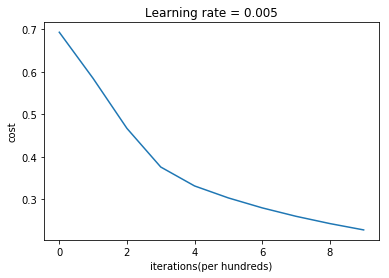

In [196]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.title('Learning rate = %s'%d['learning_rate'])
plt.show()

### 比较学习率对训练的影响

learning rate: 0.01
训练集准确性：98.56%
测试集准确性：70.00%
learning rate: 0.001
训练集准确性：86.60%
测试集准确性：62.00%
learning rate: 0.0001
训练集准确性：66.03%
测试集准确性：36.00%


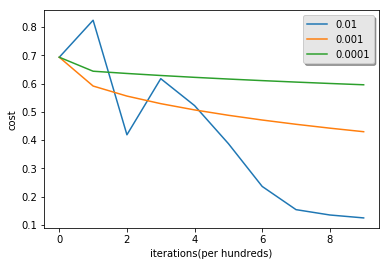

In [199]:
learning_rate=[0.01,0.001,0.0001]
models = {}
for i in learning_rate:
    print('learning rate:',i)
    models[str(i)] = model(train_set_x,train_set_y,test_set_x,test_set_y,learning_rate=i,num_iterations=1000)
    print("==================================")
    
for i in learning_rate:
    plt.plot(np.squeeze(models[str(i)]['costs']),label=str(models[str(i)]['learning_rate']))

plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
# 图例
legend = plt.legend(loc='upper right',shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()